# **Práctica 5: Clustering Particional (Segmentación de clientes)**

Nombre: Casasola García Oscar

No. Cuenta: 316123747

Email: oscar.casasola.g7@gmail.com

#Fuente de datos
* ingresos: son ingresos mensuales de 1 o 2 personas, si están casados.
* gastos_comunes: son gastos mensuales de 1 o 2 personas, si están casados. 
* pago_coche
* gastos_otros
* ahorros
* vivienda: valor de la vivienda.
* estado_civil: 0-soltero, 1-casado, 2-divorciado
* hijos: cantidad de hijos menores (no trabajan).
* trabajo: 0-sin trabajo, 1-autonomo, 2-asalariado, 3-empresario, 4-autonomos, 5-asalariados, 6-autonomo 
y asalariado, 7-empresario y autonomo, 8-empresarios o empresario y autónomo 
* comprar: 0-alquilar, 1-comprar casa a través de crédito hipotecario con tasa fija a 30 años.


# Objetivo 
Obtener clústeres de casos de usuarios, con características similares, evaluados para la adquisición 
de una casa a través de un crédito hipotecario con tasa fija a 30 años.

# 1) Importar las bibliotecas y los datos 

In [35]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline 

In [ ]:
from google.colab import files
files.upload() 

#from google.colab import drive
#drive.mount('/content/drive')

In [36]:
Hipoteca = pd.read_csv("Hipoteca.csv")
Hipoteca 

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [37]:
Hipoteca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [38]:
print(Hipoteca.groupby('comprar').size()) 

comprar
0    135
1     67
dtype: int64


# 2) Selección de características
## Evaluación visual

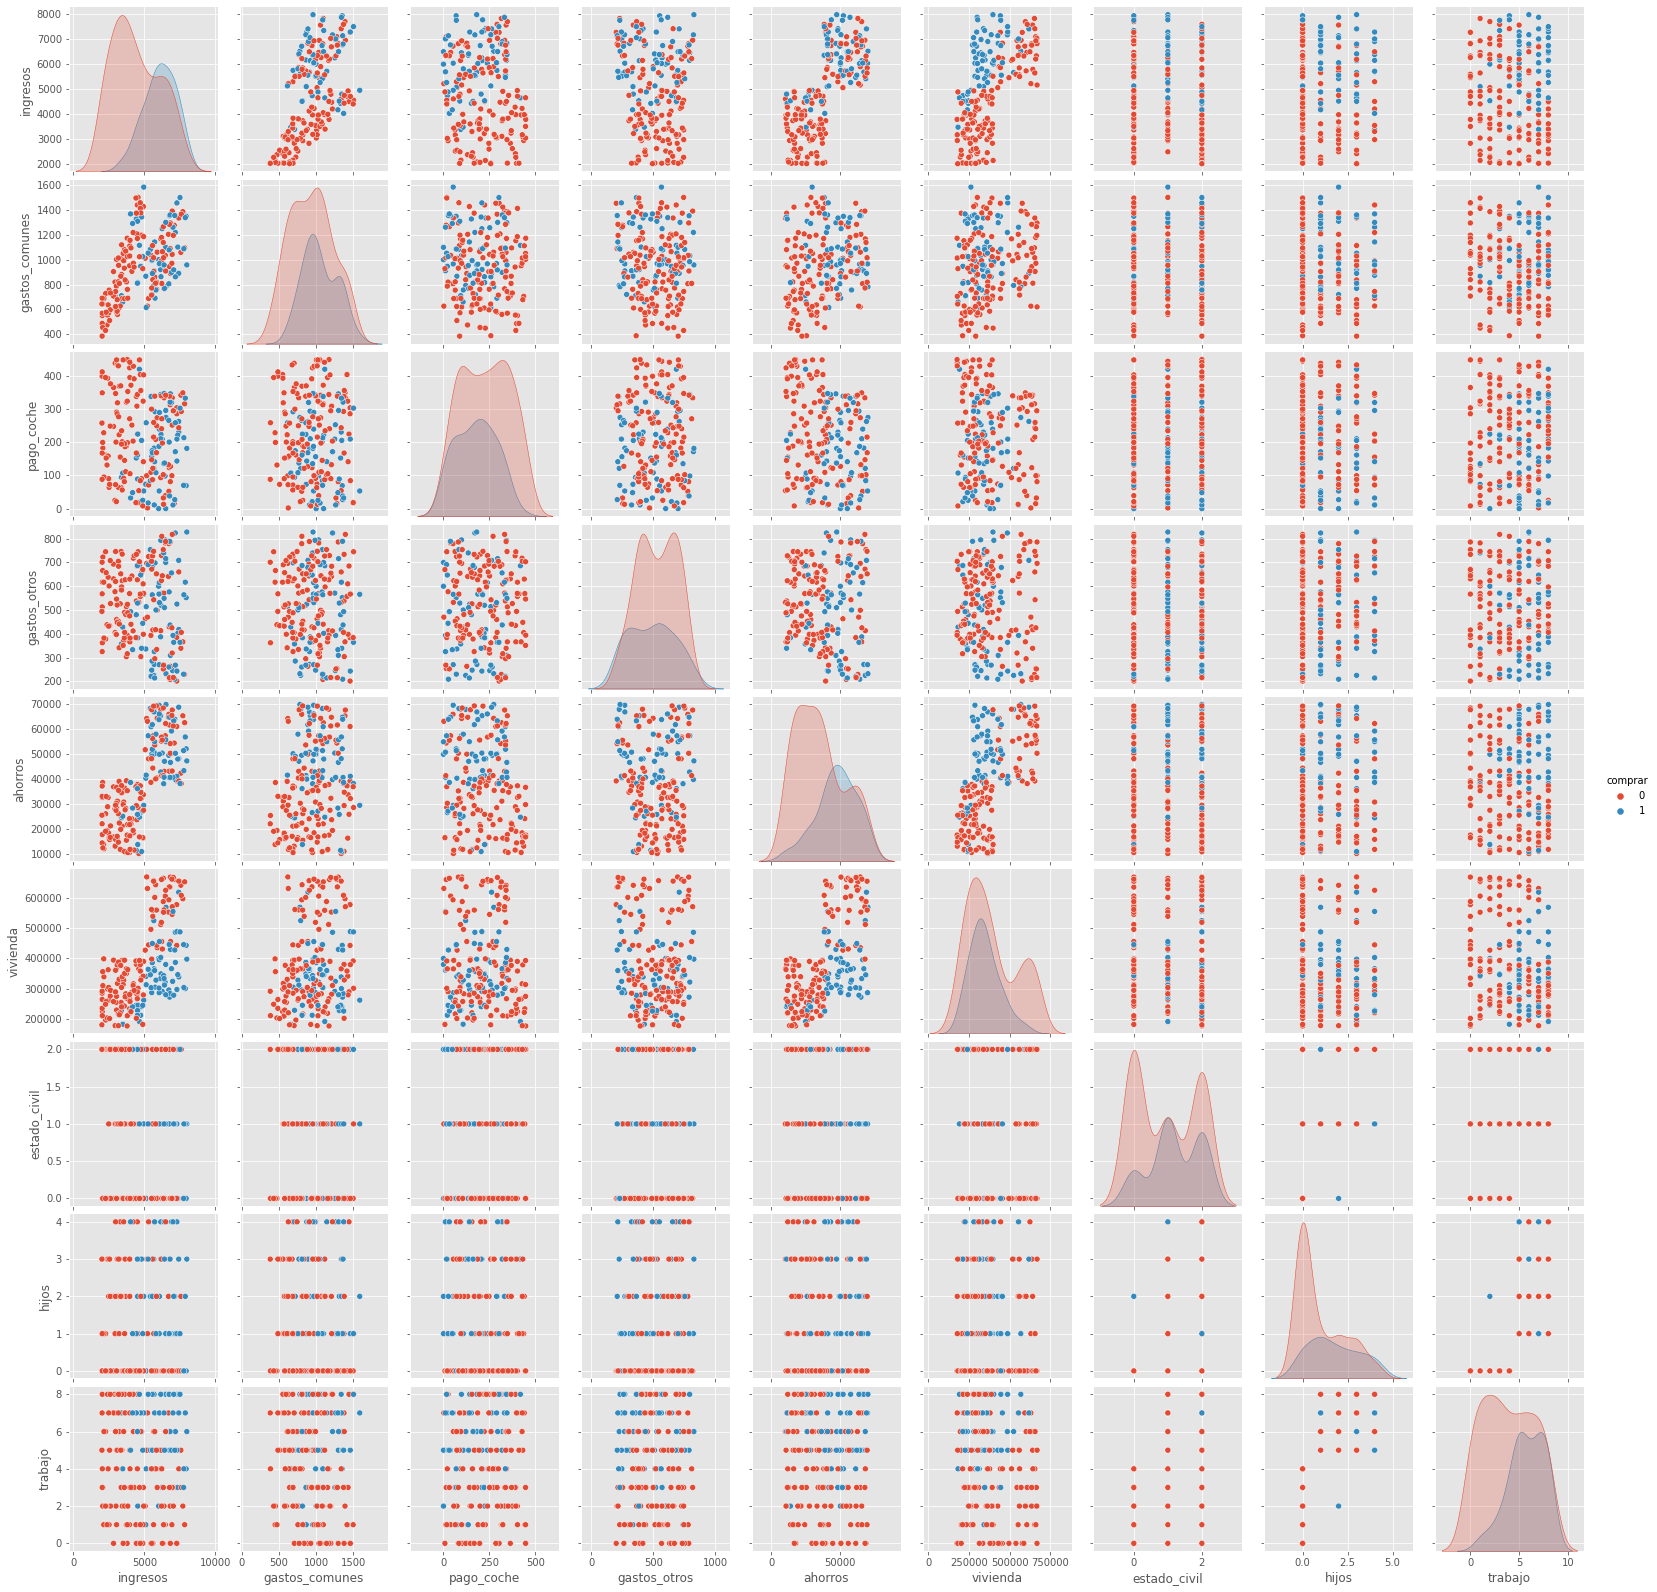

In [39]:
sns.pairplot(Hipoteca, hue='comprar')
plt.show() 

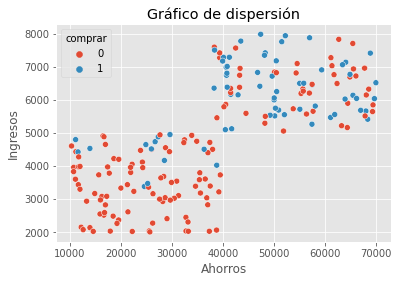

In [41]:
sns.scatterplot(x='ahorros', y ='ingresos', data=Hipoteca, hue='comprar')
plt.title('Gráfico de dispersión')
plt.xlabel('Ahorros')
plt.ylabel('Ingresos')
plt.show()

## Matriz de correlaciones

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas. Se emplea la función corr()

In [42]:
CorrHipoteca = Hipoteca.corr(method='pearson')
CorrHipoteca

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
ingresos,1.000000,0.560211,-0.109780,-0.124105,0.712889,0.614721,-0.042556,-0.024483,-0.038852,0.467123
gastos_comunes,0.560211,1.000000,-0.054400,-0.099881,0.209414,0.204781,-0.057152,-0.072321,-0.079095,0.200191
pago_coche,-0.109780,-0.054400,1.000000,0.010602,-0.193299,-0.094631,0.052239,-0.044858,0.018946,-0.196468
gastos_otros,-0.124105,-0.099881,0.010602,1.000000,-0.064384,-0.054577,-0.020226,0.124845,0.047313,-0.110330
ahorros,0.712889,0.209414,-0.193299,-0.064384,1.000000,0.605836,-0.063039,0.001445,-0.023829,0.340778
vivienda,0.614721,0.204781,-0.094631,-0.054577,0.605836,1.000000,-0.113420,-0.141924,-0.211790,-0.146092
estado_civil,-0.042556,-0.057152,0.052239,-0.020226,-0.063039,-0.113420,1.000000,0.507609,0.589512,0.142799
hijos,-0.024483,-0.072321,-0.044858,0.124845,0.001445,-0.141924,0.507609,1.000000,0.699916,0.272883
trabajo,-0.038852,-0.079095,0.018946,0.047313,-0.023829,-0.211790,0.589512,0.699916,1.000000,0.341537
comprar,0.467123,0.200191,-0.196468,-0.110330,0.340778,-0.146092,0.142799,0.272883,0.341537,1.000000


In [43]:
print(CorrHipoteca['ingresos'].sort_values(ascending=False)[:10], '\n')   #Top 10 valores 

ingresos          1.000000
ahorros           0.712889
vivienda          0.614721
gastos_comunes    0.560211
comprar           0.467123
hijos            -0.024483
trabajo          -0.038852
estado_civil     -0.042556
pago_coche       -0.109780
gastos_otros     -0.124105
Name: ingresos, dtype: float64 



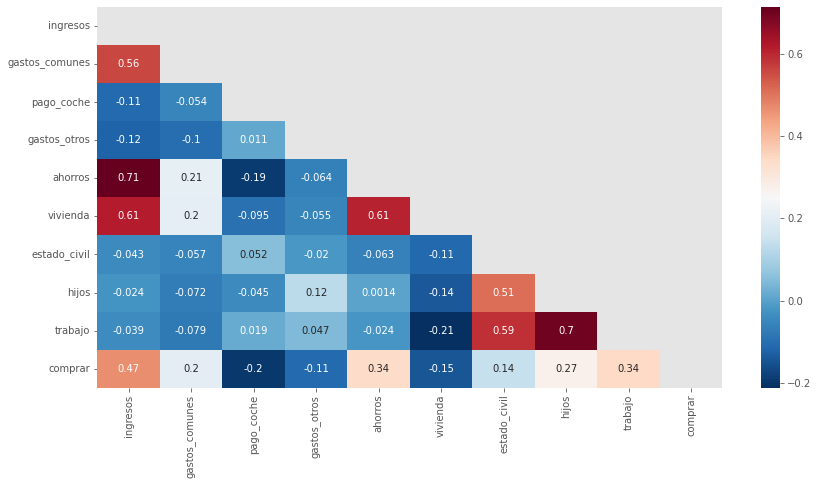

In [44]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrHipoteca)
sns.heatmap(CorrHipoteca, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

## **Selección de variables:**

a) A pesar de existir 2 correlaciones altas, entre 'ingresos' y 'ahorros' (0.71) y 'trabajo' e 'hijos' (0.69); éstas se tomarán en cuenta para obtener una segmentación que combine las variables mediante la similitud de los elementos.

b) Se suprimirá la variable 'comprar' debido a que representa inherentemente un agrupamiento, y fue un campo calculado con base a un análisis hipotecario preliminar.

In [45]:
MatrizHipoteca = np.array(Hipoteca[['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros', 'vivienda', 'estado_civil', 'hijos', 'trabajo']])
pd.DataFrame(MatrizHipoteca) 
#MatrizHipoteca = Hipoteca.iloc[:, 0:9].values     #iloc para seleccionar filas y columnas según su posición

,0,1,2,3,4,5,6,7,8
0,6000,1000,0,600,50000,400000,0,2,2
1,6745,944,123,429,43240,636897,1,3,6
2,6455,1033,98,795,57463,321779,2,1,8
3,7098,1278,15,254,54506,660933,0,0,3
4,6167,863,223,520,41512,348932,0,0,3
...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2
198,3961,1030,270,475,21880,280421,2,3,8
199,3184,955,276,684,35565,388025,1,3,8
200,3334,867,369,652,19985,376892,1,2,5


# 3) Aplicación del algoritmo
##**Algoritmo: K-means**

Cuando se trabaja con clustering, dado que son algoritmos basados en distancias, es fundamental escalar los datos para que cada una de las variables contribuyan por igual en el análisis.

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
estandarizar = StandardScaler()                               # Se instancia el objeto StandardScaler o MinMaxScaler 
MEstandarizada = estandarizar.fit_transform(MatrizHipoteca)   # Se calculan la media y desviación y se escalan los datos

pd.DataFrame(MEstandarizada)  # Matriz estandarizada

,0,1,2,3,4,5,6,7,8
0,0.620129,0.104689,-1.698954,0.504359,0.649475,0.195910,-1.227088,0.562374,-0.984420
1,1.063927,-0.101625,-0.712042,-0.515401,0.259224,1.937370,-0.029640,1.295273,0.596915
2,0.891173,0.226266,-0.912634,1.667244,1.080309,-0.379102,1.167809,-0.170526,1.387582
3,1.274209,1.128886,-1.578599,-1.559015,0.909604,2.114062,-1.227088,-0.903426,-0.589086
4,0.719611,-0.400042,0.090326,0.027279,0.159468,-0.179497,-1.227088,-0.903426,-0.589086
...,...,...,...,...,...,...,...,...,...
197,-0.671949,-1.037402,1.125381,-0.163554,-1.617963,-0.075199,-1.227088,-0.903426,-0.984420
198,-0.594508,0.215214,0.467439,-0.241079,-0.973876,-0.683130,1.167809,1.295273,1.387582
199,-1.057368,-0.061099,0.515581,1.005294,-0.183849,0.107880,-0.029640,1.295273,1.387582
200,-0.968013,-0.385305,1.261783,0.814462,-1.083273,0.026040,-0.029640,0.562374,0.201581


In [47]:
#Se importan las bibliotecas
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

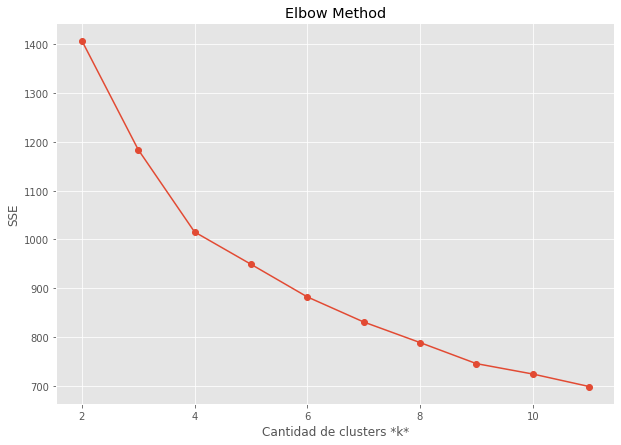

In [48]:
#Definición de k clusters para K-means
#Se utiliza random_state para inicializar el generador interno de números aleatorios
SSE = []
for i in range(2, 12):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(MEstandarizada)
    SSE.append(km.inertia_)

#Se grafica SSE en función de k
plt.figure(figsize=(10, 7))
plt.plot(range(2, 12), SSE, marker='o')
plt.xlabel('Cantidad de clusters *k*')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

**Observación.** En la práctica, puede que no exista un codo afilado (codo agudo) y, como método heurístico, ese "codo" no siempre puede identificarse sin ambigüedades.

In [50]:
!pip install kneed #Función que nos permite calcular el número estimado de clústers

Note: you may need to restart the kernel to use updated packages.


El nombre de archivo, el nombre de directorio o la sintaxis de la etiqueta del volumen no son correctos.


In [51]:
from kneed import KneeLocator
kl = KneeLocator(range(2, 12), SSE, curve="convex", direction="decreasing")
kl.elbow # 4

4

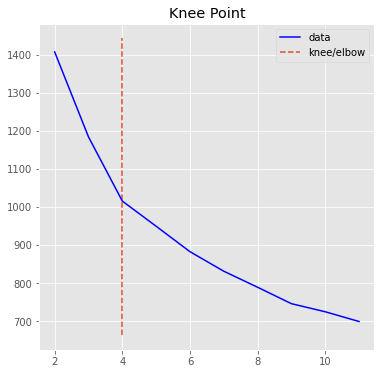

In [52]:
plt.style.use('ggplot')
kl.plot_knee()

In [53]:
#Se crean las etiquetas de los elementos en los clústeres
MParticional = KMeans(n_clusters=4, random_state=0).fit(MEstandarizada)
MParticional.predict(MEstandarizada)
MParticional.labels_

array([3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2,
       3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2,
       3, 3, 0, 2, 2, 3, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 3, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 3, 2, 2, 3, 3, 2, 3, 2,
       2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 0, 1, 0,
       3, 0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 3, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0])

In [54]:
Hipoteca = Hipoteca.drop(columns=['comprar'])
Hipoteca['clusterP'] = MParticional.labels_
Hipoteca

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,clusterP
0,6000,1000,0,600,50000,400000,0,2,2,3
1,6745,944,123,429,43240,636897,1,3,6,2
2,6455,1033,98,795,57463,321779,2,1,8,2
3,7098,1278,15,254,54506,660933,0,0,3,3
4,6167,863,223,520,41512,348932,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,1
199,3184,955,276,684,35565,388025,1,3,8,1
200,3334,867,369,652,19985,376892,1,2,5,1


In [55]:
#Cantidad de elementos en los clusters
numClusters = Hipoteca.groupby(['clusterP'])['clusterP'].count()
print(numClusters)

clusterP
0    43
1    56
2    54
3    49
Name: clusterP, dtype: int64


In [ ]:
Hipoteca[Hipoteca.clusterP == 0] 

## Obtención de los centroides

In [21]:
CentroidesP = Hipoteca.groupby('clusterP').mean()
CentroidesP 

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
clusterP,,,,,,,,,
0,3502.930233,857.209302,245.790698,533.627907,24129.139535,291900.953488,0.348837,0.000000,2.093023
1,3472.482143,905.607143,224.732143,536.589286,23957.642857,272010.535714,1.625000,2.250000,6.660714
2,6389.685185,998.851852,190.203704,524.148148,54899.722222,430860.092593,1.462963,2.222222,6.296296
3,6358.959184,1117.306122,190.755102,465.653061,50687.081633,497262.265306,0.448980,0.061224,2.122449


In [22]:
n = 0
colum = 0
while n < numClusters.size:
  print("- Clúster número:", n)
  print("a) Este clúster está conformado por", numClusters[n], "casos de una evaluación hipotecaria.")
  print("b) Con un ingreso promedio mensual de", CentroidesP.iloc[n][colum].round(2),"USD")
  print("c) Con gastos comunes promedios de", CentroidesP.iloc[n][colum+1].round(2),"USD")
  print("d) Tienen un pago promedio mensual de su coche de", CentroidesP.iloc[n][colum+2].round(2),"USD")
  print("e) Otros gastos en promedio de", CentroidesP.iloc[n][colum+3].round(2),"USD")
  gastos_totales = CentroidesP.iloc[n][colum+1].round(2) + CentroidesP.iloc[n][colum+2].round(2) +CentroidesP.iloc[n][colum+3].round(2)
  gasto_promedio = (gastos_totales/CentroidesP.iloc[n][colum].round(2))*100
  print("Estos gastos en promedio representan el",gasto_promedio.round(2),"% del ingreso total.")
  print("f) Por otro lado, este grupo de usuarios tienen un ahorro promedio de", CentroidesP.iloc[n][colum+4].round(2),"USD")
  print("g) y un valor promedio de vivienda (a comprar o hipotecar) de", CentroidesP.iloc[n][colum+5].round(2),"USD")
  print("h) Además, su estado civil en promedio es: ", CentroidesP.iloc[n][colum+6].round(2),"[ 0-soltero, 1-casado, 2-divorciado ]")
  print("i) Tienen en promedio,", CentroidesP.iloc[n][colum+7].round(2), "hijos menores")
  print("y tienen en promedio un tipo de trabajo", CentroidesP.iloc[n][colum+8].round(2),"[ 0-sin trabajo, 1-autónomo, 2-asalariado, 3-empresario, 4-autonomos, 5-asalariados, 6-autonomo y asalariado, 7-empresario y autonomo, 8-empresarios o empresario y autónomo ]")
  n = n + 1
  print("--------------------------------------------------------------")

- Clúster número: 0
a) Este clúster está conformado por 43 casos de una evaluación hipotecaria.
b) Con un ingreso promedio mensual de 3502.93 USD
c) Con gastos comunes promedios de 857.21 USD
d) Tienen un pago promedio mensual de su coche de 245.79 USD
e) Otros gastos en promedio de 533.63 USD
Estos gastos en promedio representan el 46.72 % del ingreso total.
f) Por otro lado, este grupo de usuarios tienen un ahorro promedio de 24129.14 USD
g) y un valor promedio de vivienda (a comprar o hipotecar) de 291900.95 USD
h) Además, su estado civil en promedio es:  0.35 [ 0-soltero, 1-casado, 2-divorciado ]
i) Tienen en promedio, 0.0 hijos menores
y tienen en promedio un tipo de trabajo 2.09 [ 0-sin trabajo, 1-autónomo, 2-asalariado, 3-empresario, 4-autonomos, 5-asalariados, 6-autonomo y asalariado, 7-empresario y autonomo, 8-empresarios o empresario y autónomo ]
--------------------------------------------------------------
- Clúster número: 1
a) Este clúster está conformado por 56 casos de 

Clúster 0: Conformado por 49 casos de una evaluación hipotecaría, con un ingreso promedio mensual de 6358 USD, con gastos comunes de 1117 USD, otros gastos de 465 USD y un pago mensual de coche de 190 USD. Estos gastos en promedio representan menos de la tercera parte del salario mensual (1772 USD). Por otro lado, este grupo de usuarios tienen un ahorro promedio de 50687 USD, y un valor promedio de vivienda (a comprar o hipotecar) de 497262 USD. Además, en su mayoría son solteros (0-soltero), casi sin hijos menores y tienen un tipo de trabajo, en su mayoría, asalariado (2-asalariado).

...

Clúster 3: Es un segmento de clientes conformado 43 usuarios, con un ingreso promedio mensual de 3502 USD, con gastos comunes de 857 USD, otros gastos de 533 USD y un pago mensual de coche de 245 USD. Estos gastos en promedio representan casi la mitad del salario mensual (1635 USD). Por otro lado, este grupo de usuarios tienen un ahorro promedio de 24129 USD, y un valor promedio de vivienda (a comprar o hipotecar) de 291900 USD. Además, en su mayoría son solteros (0-soltero), sin hijos y tienen un tipo de trabajo asalariado (2-asalariado).

C:\Users\johnc\AppData\Local\Temp/ipykernel_8268/1272014009.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


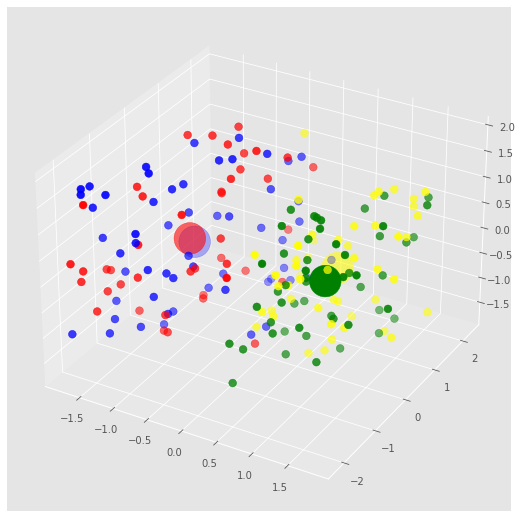

In [56]:
# Gráfica de los elementos y los centros de los clusters
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')
colores=['red', 'blue', 'green', 'yellow']
asignar=[]
for row in MParticional.labels_:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(MEstandarizada[:, 0], 
           MEstandarizada[:, 1], 
           MEstandarizada[:, 2], marker='o', c=asignar, s=60)
ax.scatter(MParticional.cluster_centers_[:, 0], 
           MParticional.cluster_centers_[:, 1], 
           MParticional.cluster_centers_[:, 2], marker='o', c=colores, s=1000)
plt.show()